In [1]:
import pandas as  pd
import matplotlib.pyplot as plt


## Load and explore the data


 Here, we check the first few rows of the sheet

In [2]:
report = pd.read_csv("amazon_sales_report.csv", encoding="latin-1")
report.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_16132\3074351273.py:1: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  report = pd.read_csv("amazon_sales_report.csv", encoding="latin-1")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
report.dtypes

index                 float64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                   float64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                    object
fulfilled-by           object
Unnamed: 22            object
dtype: object

### Summary statistics for numerical variables
We can notice that we have a little less than 129K data points, with an average sales amount of 648 in the indian currency

In [4]:
report.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128940.000000
mean,64487.000000,0.904431,648.561465,463969.927594
std,37232.019822,0.313354,281.211687,191475.956294
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


### Summary statistics for categorical variables
- It's noticable here that the counts increased by 2, which suggests two data points with null identifiers
- The number of unique states (69) sounds too many, which indicates that this column probably requires normalization and cleaning (same goes for city)


In [5]:
report.describe(include=['object'])


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128977,128977,128977,128977,128977,128977,128977,128975,128975,128975,128975,122103,121180,128942,128940,128940,79820,128973,39275,79923
unique,120379,92,14,4,3,3,1378,7195,9,11,7190,3,1,8955,69,1,5787,2,1,1
top,403-4984515-8861958,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128940,46100,128102,39275,79923


### We will now try to normalize the state
Notice that the ship-state and ship-city unique values decreased significantly, but let's see if we can get the state even less

In [6]:
report['ship-state']=report['ship-state'].str.lower()
report['ship-city']=report['ship-city'].str.lower()
report.describe(include=['object'])

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128977,128977,128977,128977,128977,128977,128977,128975,128975,128975,128975,122103,121180,128942,128940,128940,79820,128973,39275,79923
unique,120379,92,14,4,3,3,1378,7195,9,11,7190,3,1,7297,47,1,5787,2,1,1
top,403-4984515-8861958,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,bengaluru,maharashtra,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11898,22260,128940,46100,128102,39275,79923


### State abbreviations -> full names
- Here we formed an object that maps short names to state names that we'll use to convert the abbreviations in the data
- We also found 3 points that have misspelling which can easily be hardcoded as follows

In [7]:
abbreviation_to_state = {
    "ap": "andhra pradesh",
    "ar": "arunachal pradesh",
    "as": "assam",
    "br": "bihar",
    "cg": "chhattisgarh",
    "ga": "goa",
    "gj": "gujarat",
    "hr": "haryana",
    "hp": "himachal pradesh",
    "jh": "jharkhand",
    "ka": "karnataka",
    "kl": "kerala",
    "mp": "madhya pradesh",
    "mh": "maharashtra",
    "mn": "manipur",
    "ml": "meghalaya",
    "mz": "mizoram",
    "nl": "nagaland",
    "or": "odisha",
    "pb": "punjab",
    "rj": "rajasthan",
    "sk": "sikkim",
    "tn": "tamil nadu",
    "tg": "telangana",
    "tr": "tripura",
    "up": "uttar pradesh",
    "uk": "uttarakhand",
    "wb": "west bengal",
    "an": "andaman and nicobar islands",
    "ch": "chandigarh",
    "dn": "dadra and nagar haveli and daman and diu",
    "dl": "delhi",
    "jk": "jammu and kashmir",
    "la": "ladakh",
    "ld": "lakshadweep",
    "py": "puducherry"
}

state_names = list(abbreviation_to_state.values())



In [8]:
def replace_short_names(state_name):
    if state_name in abbreviation_to_state:
        return abbreviation_to_state[state_name]
    else:
        return state_name
   
    

In [9]:
report['ship-state']=report['ship-state'].replace(["rajshthan","rajsthan","punjab/mohali/zirakpur"],["rajasthan","rajasthan","punjab"])
report['ship-state']=report['ship-state'].apply(replace_short_names)
report.drop(report[report['ship-state'] == 'apo'].index, inplace=True)


In [10]:
report['ship-state'].value_counts() 

ship-state
maharashtra           22260
karnataka             17326
tamil nadu            11483
telangana             11330
uttar pradesh         10636
delhi                  6967
kerala                 6585
west bengal            5963
andhra pradesh         5430
gujarat                4489
haryana                4415
rajasthan              2718
madhya pradesh         2529
odisha                 2136
bihar                  2114
punjab                 1919
assam                  1663
uttarakhand            1553
jharkhand              1456
goa                    1137
chhattisgarh            909
himachal pradesh        788
jammu & kashmir         702
puducherry              350
chandigarh              333
manipur                 316
andaman & nicobar       257
meghalaya               207
sikkim                  205
nagaland                187
tripura                 151
arunachal pradesh       147
new delhi                81
mizoram                  76
dadra and nagar          70
ladakh   

Now let's eliminate the outliers, as suggested above, the next cells shows us that we have two points with no index values, they also have weird fulfillment values that can mess up our charts

In [11]:
report.isnull().sum()

index                     2
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier Status         6874
Qty                       2
currency               7796
Amount                 7796
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49156
B2B                       4
fulfilled-by          89701
Unnamed: 22           49053
dtype: int64

In [12]:
report.loc[report['index'].isnull()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
69618,NaN,UTTAR PRADESH,226002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128256,NaN,UTTAR PRADESH,226002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We made a choice to drop these two records as they are not useful because all the attributes are null

In [13]:
report=report.dropna(subset=['index'])

Now the outliers are removed, we need to start addressing the courier status with 6872 null points, we start by trying to find if this attribute has a relationship with another attribute

In [14]:
report.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               35
ship-postal-code         35
ship-country             35
promotion-ids         49154
B2B                       2
fulfilled-by          89699
Unnamed: 22           49051
dtype: int64

In [15]:
report.loc[report['Courier Status'].isnull()].describe(include=object)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,6872,6872,6872,6872,6872,6872,6872,6872,6872,6872,6872,0,5136,6869,6869,6869,0,6872,6872,4057
unique,6393,91,3,1,1,1,844,2587,8,11,2587,0,1,1430,37,1,0,2,1,1
top,171-5057375-2831560,04-16-22,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,NaN,INR,hyderabad,maharashtra,IN,NaN,False,Easy Ship,False
freq,12,137,6861,6872,6872,6872,444,101,2624,1291,101,NaN,5136,459,1039,6869,NaN,6849,6872,4057


The below snipets suggest the following
- We can assume that the courier status is cancelled when the order status is cancelled
- we can assume that the courier status is shipped, when the order status is shipped - xxx

In [16]:
report.loc[report['Status']=="Cancelled",'Courier Status'].describe(include=object)


count         11470
unique            2
top       Cancelled
freq           5839
Name: Courier Status, dtype: object

In [17]:
report.loc[report['Status']=="Shipped - Delivered to Buyer",'Courier Status'].describe()

count       28761
unique          1
top       Shipped
freq        28761
Name: Courier Status, dtype: object

In [18]:
report.loc[report['Status']=="Shipped - Delivered to Seller",'Courier Status'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Courier Status, dtype: object

In [19]:
report.loc[report['Status']=="Shipped - Returned to Seller",'Courier Status'].describe()

count        1950
unique          1
top       Shipped
freq         1950
Name: Courier Status, dtype: object

Imputating the nulls based on our assumptions

In [20]:
m1 = report['Courier Status'].isnull() & (report['Status']=="Cancelled")
m2 = report['Courier Status'].isnull() &( (report['Status']=="Shipped - Delivered to Seller")| (report['Status']=="Shipped - Delivered to Buyer")| (report['Status']=="Shipped - Returned to Seller"))
report.loc[m1,"Courier Status"] = report.loc[m1,"Courier Status"].fillna("Cancelled")
report.loc[m2,"Courier Status"] = report.loc[m2,"Courier Status"].fillna("Shipped")


Now the courier status is completely resolved,
- for the currency, we can assume all in indian currency
- for the amount, we can assume 0s for missing values

In [21]:
report.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               35
ship-postal-code         35
ship-country             35
promotion-ids         49154
B2B                       2
fulfilled-by          89699
Unnamed: 22           49051
dtype: int64

In [22]:
report['Amount']=report['Amount'].fillna(0)
report['currency']=report['currency'].fillna("INR")

In [23]:
report.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                33
ship-state               35
ship-postal-code         35
ship-country             35
promotion-ids         49154
B2B                       2
fulfilled-by          89699
Unnamed: 22           49051
dtype: int64

To finish cleaning up, we need to drop a useless column named "Unnamed: 22" and also convert the date field to datetime

In [24]:
report.drop('Unnamed: 22', axis=1, inplace=True)
report['Date']=pd.to_datetime(report['Date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_16132\1833584714.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  report['Date']=pd.to_datetime(report['Date'])


Now, we save the data after cleaning

In [25]:
report.to_csv('clean_amazon_sales_report.csv', index=False, encoding='utf-8')


### Data Visualization
Now that we finished EDA and data cleaning, we'll start seeing some charts and insights

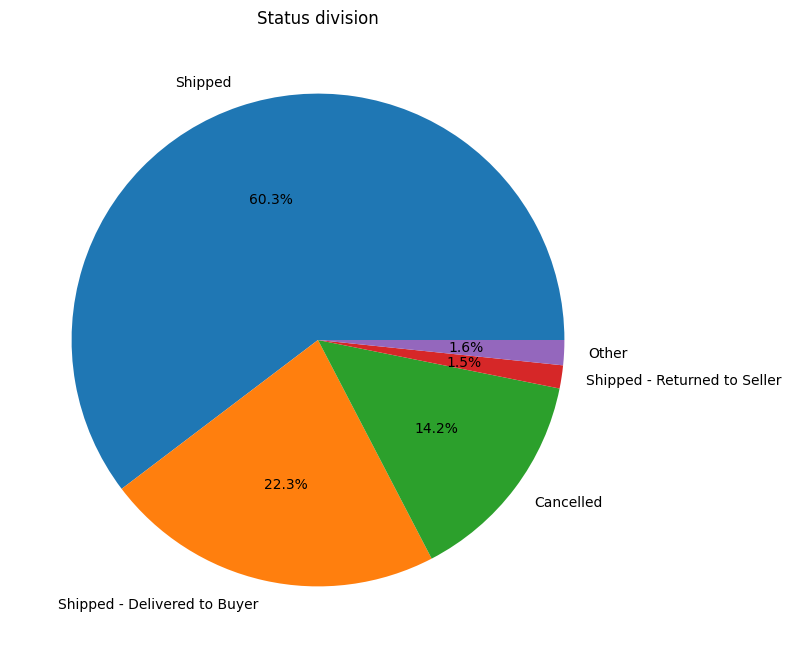

In [26]:
status_modified=report.loc[report['Status']!=("Shipped","Cancelled","Shipped - Deliveierd to Buyer")]
data = status_modified['Status'].value_counts(normalize=True)*100
others_value = data[4:].sum()
data=data[:4]
data_values = data.values.tolist()
data_labels = data.index.tolist()
data_values.append(others_value)
data_labels.append("Other")
plt.figure(figsize=(8, 8))
plt.title('Status division')
plt.pie(data_values, labels=data_labels,autopct='%1.1f%%')
plt.show()


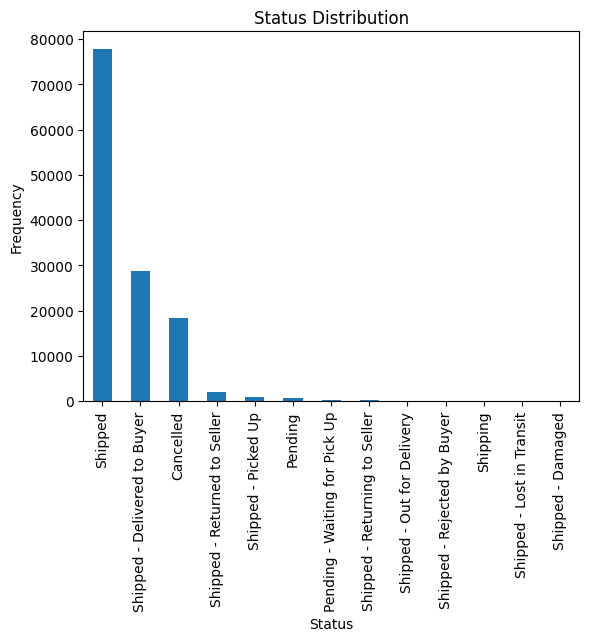

In [27]:
report['Status'].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Status Distribution')
plt.show()

### Insights
- 60.3% of orders are in the "Shipped" status, indicating a large portion of orders are on their way to customers.
- 22.3% of orders are "Shipped - Delivered to Buyer", representing successful deliveries.
- 14.2% of orders are canceled, which could indicate potential issues with the ordering or inventory process.
- 1.5% of orders are "Shipped - Returned to Seller", reflecting instances where buyers sent items back.
- 1.6% of orders fall under "Other" categories, which may include various less common statuses.

Monthly sales trends

In [28]:

report['month_name']=report['Date'].dt.strftime('%B')
# print(report['month_name'])
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 
             5: 'May', 6: 'June', 7: 'July', 8: 'August', 
             9: 'September', 10: 'October', 11: 'November', 12: 'December'}

month_report=report.groupby(report['Date'].dt.month).agg({'Amount':'sum'}).reset_index()
month_report['month_name'] = month_report['Date'].map(month_map)
month_report = month_report[['Date', 'month_name', 'Amount']]

print(month_report)

   Date month_name       Amount
0     3      March    101683.85
1     4      April  28838708.32
2     5        May  26226476.75
3     6       June  23425809.38


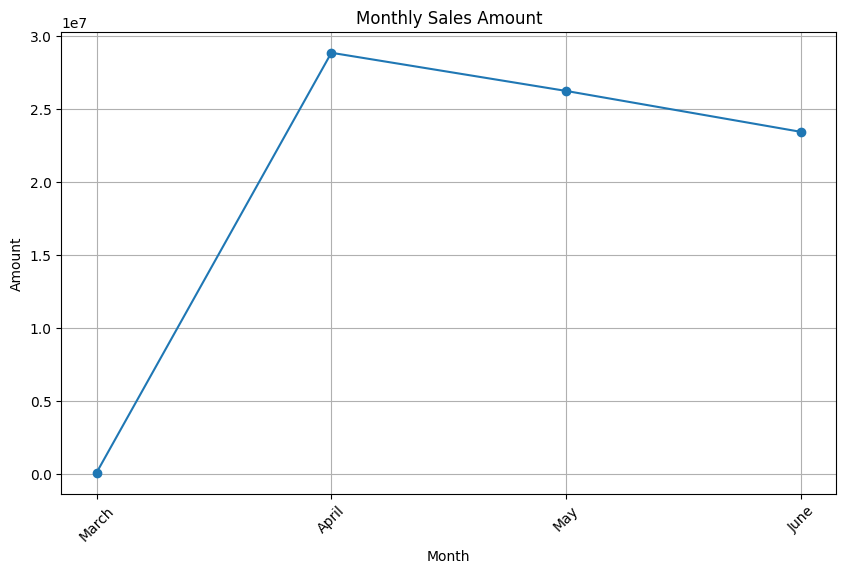

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(month_report['month_name'], month_report['Amount'], marker='o')
plt.title('Monthly Sales Amount')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Insights
- Strong Growth in April: There is a significant increase in sales amount from March to April, peaking around 
30M
- Stable High Sales in May: While there is a slight decline from April, sales in May remain relatively high, indicating sustained performance.
- Decline in June: Sales amount declines in June, suggesting a potential seasonal dip or impact from external factors.
- Focus on April: The spike in April suggests that there might have been successful promotions, product launches, or other events driving sales.

Sales over time

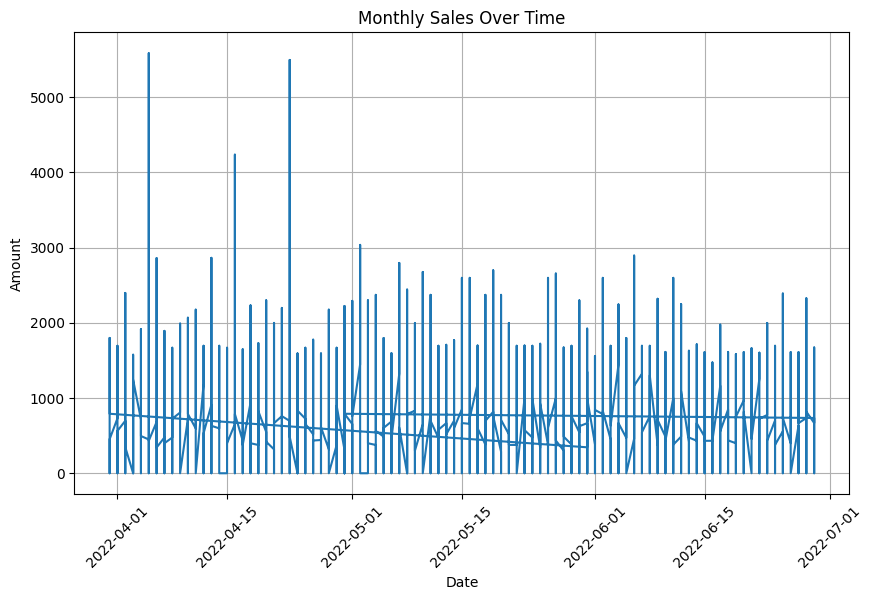

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(report['Date'], report['Amount'])
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

Fulfillment distribution

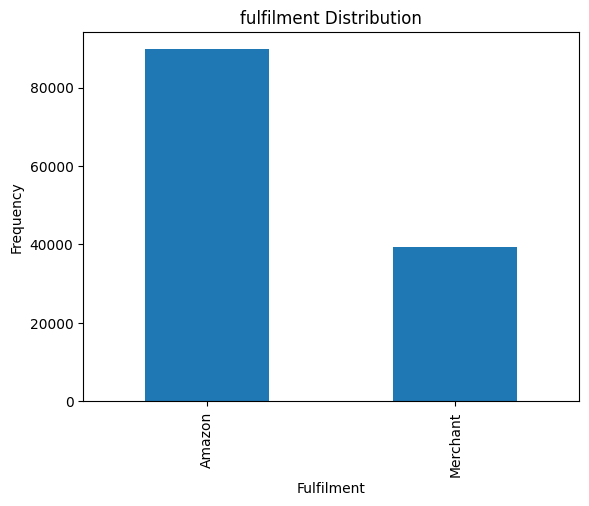

In [31]:
report['Fulfilment'].value_counts().plot(kind='bar')
plt.xlabel('Fulfilment')
plt.ylabel('Frequency')
plt.title('fulfilment Distribution')
plt.show()

### Insights
- Orders fulfilled by Amazon significantly outnumber those by merchants, with Amazon handling nearly twice the volume.
- Merchant fulfillment shows a lower frequency, indicating a reliance on Amazon for order fulfillment.
- The higher frequency of Amazon fulfillment could suggest better efficiency, reliability, or customer preference for Amazon's fulfillment services.
- There may be opportunities for merchants to increase their fulfillment share by improving their fulfillment processes or offering competitive advantages.

Sales by ship state

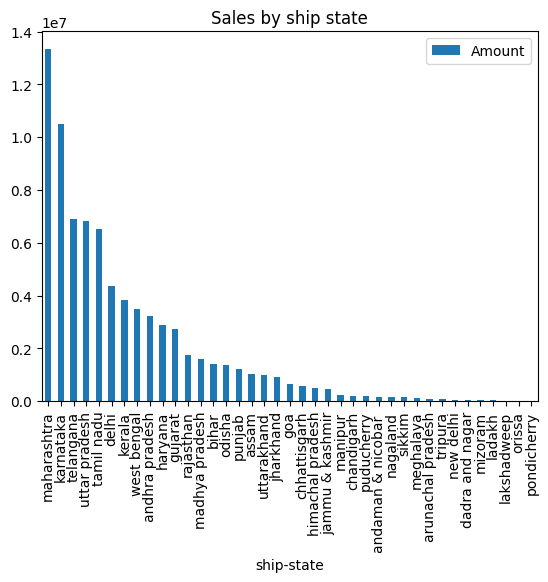

In [32]:
state_report=report.groupby(report['ship-state']).agg({'Amount':'sum'})
state_report=state_report.sort_values('Amount',ascending=False)
state_report.plot(kind='bar')
plt.title('Sales by ship state')
plt.show()

### Insights
- Maharashtra, Karnataka, and Telangana lead in sales, each generating over 
10M in revenue.
- Uttar Pradesh, Tamil Nadu, and Delhi also show strong sales performance, contributing significantly to the total sales.
- States like Kerala, West Bengal, and Andhra Pradesh form a mid-tier in sales performance, with a noticeable drop compared to the top states.
- States like Pondicherry, Lakshadweep, and Mizoram show minimal sales, indicating either low market penetration or demand.
- There is a clear disparity in sales across different states, suggesting potential for market expansion or targeted marketing strategies in lower-performing regions.

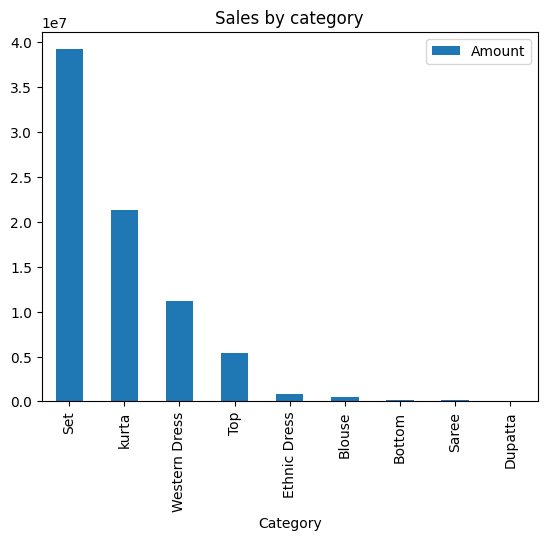

In [33]:
category_report=report.groupby(report['Category']).agg({'Amount':'sum'},{'Style':'count'})
category_report=category_report.sort_values('Amount',ascending=False)
category_report.plot(kind='bar')
plt.title("Sales by category")
plt.show()

### Insights
- The "Set" category significantly leads in sales, generating nearly 
40M in revenue. This suggests high demand or effective marketing for bundled products.
- "Kurta" and "Western Dress" follow, indicating substantial consumer interest in these categories as well.
- The "Top" category shows moderate sales, positioned below the leading categories but above the lower tiers.
- Categories like "Ethnic Dress", "Blouse", "Bottom", "Saree", and "Dupatta" have much lower sales, indicating either niche markets or less emphasis in marketing and inventory or less customer interest in the local dresses


           Amount
Size             
M     13906754.37
L     13234886.19
XL    12464965.86
XXL   10636288.45
S     10629210.18
3XL    9157147.68
XS     7022375.20
6XL     576249.33
5XL     425156.63
4XL     334451.64
Free    205192.77


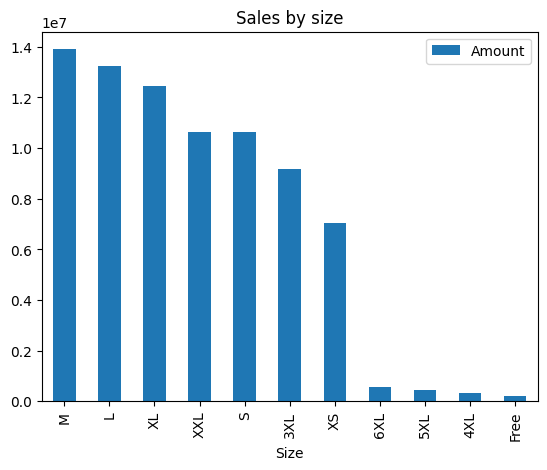

In [34]:
size_report=report.groupby(report['Size']).agg({'Amount':'sum'})
size_report=size_report.sort_values('Amount',ascending=False)
print(size_report)
size_report.plot(kind='bar')
plt.title("Sales by size")
plt.show()

### Insights
This chart indicates a strong preference for medium to large sizes among customers, suggesting a focus on these sizes for inventory and marketing strategies. It also highlights potential opportunities to address the needs of customers looking for very large or very small sizes.

Ship Service level division

ship-service-level
Expedited    8861400
Standard     4036000
Name: count, dtype: int64


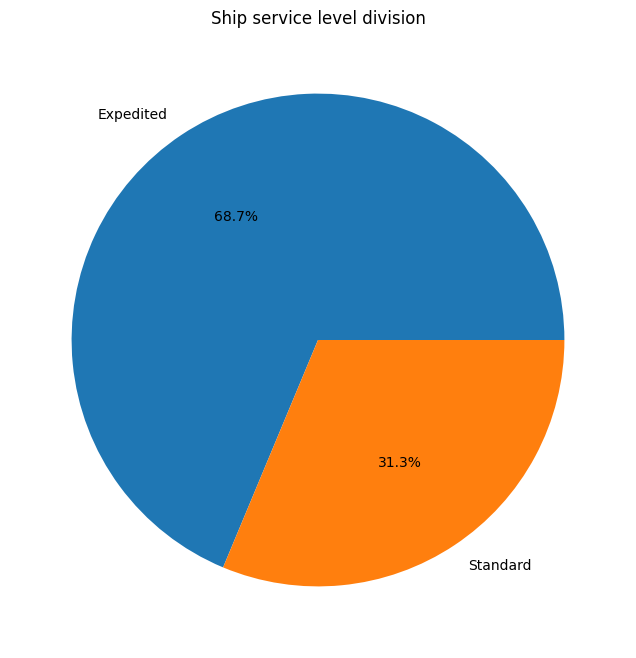

In [35]:
data=report['ship-service-level'].value_counts()*100
print(data)
plt.figure(figsize=(8, 8))
plt.pie(data.values.tolist(), labels=data.index.tolist(),autopct='%1.1f%%')
plt.title('Ship service level division')
plt.show()

### Insights
- The majority of orders (68.7%) use Expedited shipping, indicating a strong customer preference for faster delivery options.
- 31.3% of orders are shipped using Standard shipping, suggesting that a considerable segment of customers either opts for lower shipping costs or does not require urgent delivery.
 
The high percentage of expedited shipping could reflect customer expectations for quick delivery, possibly influencing satisfaction and repeat purchases.

## Conclusion
we have went through the data exploration, found some outliers and room for cleaning which we handled, then we moved on to some charts which are information-revealing and can give us valuable insights on the sales operation